# Airline Dataset Processing

## TODO 

* [x] Imbalanced Data
* [x] Outliers
* [x] Feature engineering
* [x] Train-test split

## Import Libraries

In [1]:
import os
from datetime import datetime
import logging
_ABSOLUTE_DIR = os.getcwd()
import typing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import math

## Get pre-processed data

In [2]:
df_airline_train_preprocessed = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_train__preprocessed.csv')
df_airline_test_preprocessed = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_test__preprocessed.csv')

## Imbalanced data

The target of this dataset is the customer satisfaction. When we looked to the distribution of that feature in step 1, we verified that 43,3% of the training data are about satisfied customers and 56,7% are about unsatisfied customers. In the testing data, we verified that 43,9% of the data are about satisfied customers and 56,1% are about unsatisfied customers.

We are dealing with a balanced dataset, so it's not necessary perform data balancing.

## Outliers

In the first step, when we looked to the distribution of the feature Arrival Delay in Minutes and the feature Departure Delay in Minutes, we could see that most of the values are between 0 and 100 minutes but there are values up to 1592 minutes.

This shows that there may be some outliers.

### Outliers in Arrival Delay in Minutes

The maximum value that was recorded in this feature was the following:

In [3]:
max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique())

1584.0

Now, let's see the distribution of this feature in both datasets again.

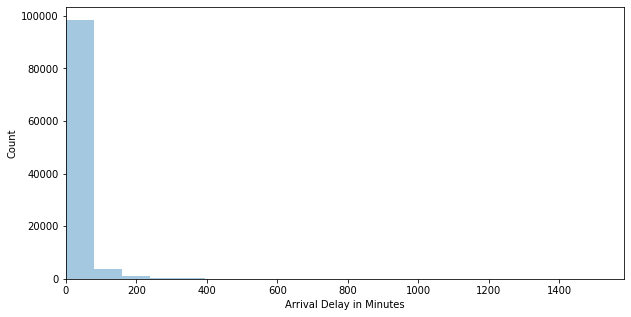

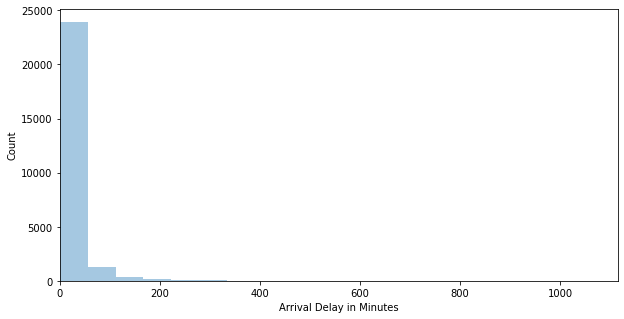

In [4]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

We can see that the majority of the values are between 0 and 200. So, we are going to discard the values that are bigger than 200.

First, we make copies of the dataframes to ensure that data balance is not compromised, if it's not then we place the transformations on the original dataframes.

Now, we can see the new distribution of the data of this feature.

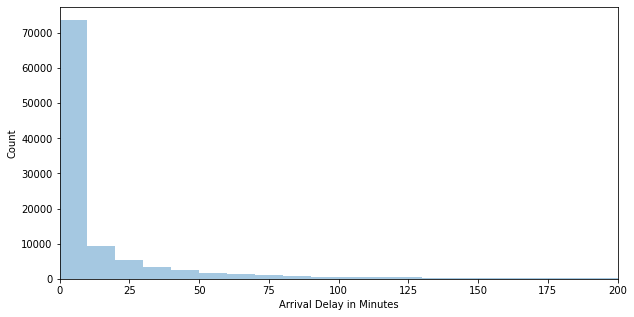

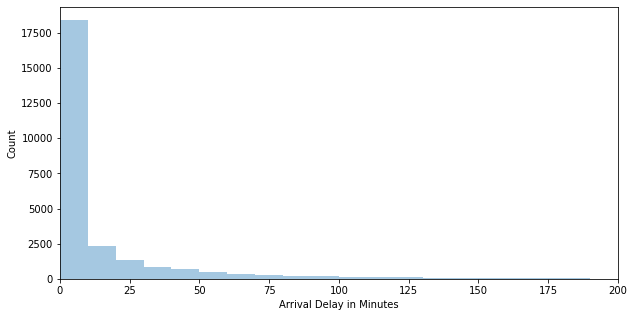

In [5]:
df_airline_train_preprocessed_v1= df_airline_train_preprocessed.copy()
df_airline_test_preprocessed_v1= df_airline_test_preprocessed.copy()
df_airline_train_preprocessed_v1 = df_airline_train_preprocessed_v1[df_airline_train_preprocessed_v1['Arrival Delay in Minutes']<=200]
df_airline_test_preprocessed_v1 = df_airline_test_preprocessed_v1[df_airline_test_preprocessed_v1['Arrival Delay in Minutes']<=200]

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed_v1['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Arrival Delay in Minutes'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed_v1['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed_v1['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Arrival Delay in Minutes'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed_v1['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

Now let's see if this transformation affected the balance of the data.

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

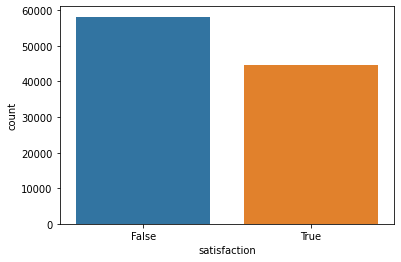

In [6]:
sns.countplot(x = df_airline_train_preprocessed_v1['satisfaction'])

In [7]:
print(f'In terms of percentage in the trainining set, {round(df_airline_train_preprocessed_v1["satisfaction"].sum()/df_airline_train_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the training dataset.')

In terms of percentage in the trainining set, 43.4% are satisfied in the data related to the training dataset.


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

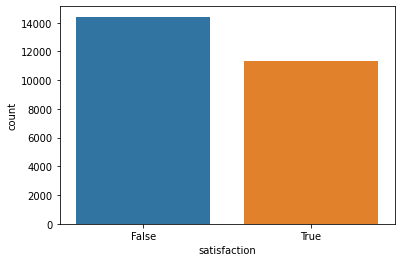

In [8]:
sns.countplot(x = df_airline_test_preprocessed_v1['satisfaction'])

In [9]:
print(f'In terms of percentage in the test set, {round(df_airline_test_preprocessed_v1["satisfaction"].sum()/df_airline_test_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the test dataset.')

In terms of percentage in the test set, 43.9% are satisfied in the data related to the test dataset.


We can see that this transformation did not affect the balance of the data, on the contrary, the data were even more balanced.

### Outliers in Departure Delay in Minutes

Now let's look to the feature Departure Delay in Minutes.

The maximum value that was recorded in this feature was the following:

In [10]:
max(df_airline_train_preprocessed['Departure Delay in Minutes'].unique())

1592

Now, let's see the distribution of this feature in both datasets again.

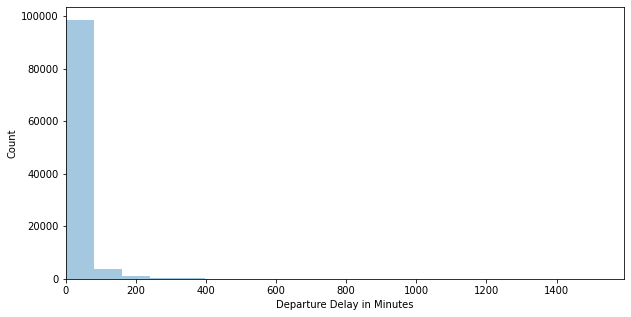

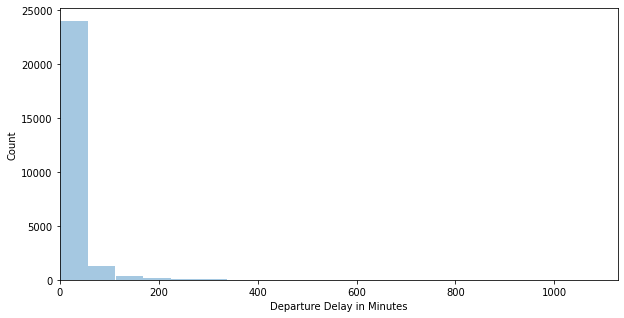

In [11]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Departure Delay in Minutes'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Departure Delay in Minutese'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

We can see that the majority of the values are between 0 and 200. So, we are going to discard the values that are bigger than 200.

Now, let's look to the new distribution of the data.

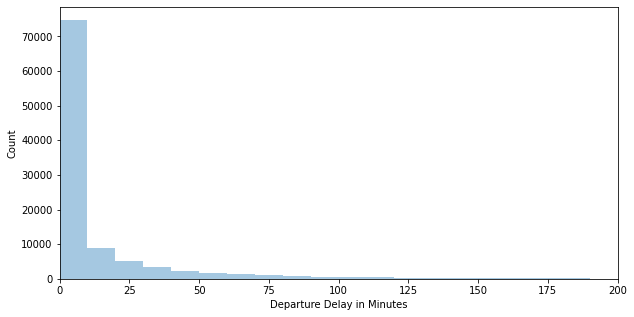

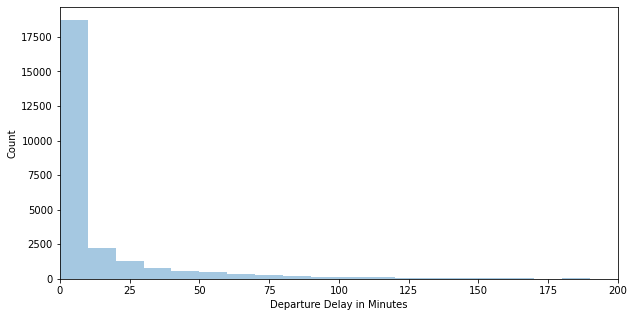

In [12]:
df_airline_train_preprocessed_v1 = df_airline_train_preprocessed_v1[df_airline_train_preprocessed_v1['Departure Delay in Minutes']<=200]
df_airline_test_preprocessed_v1 = df_airline_test_preprocessed_v1[df_airline_test_preprocessed_v1['Departure Delay in Minutes']<=200]

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed_v1['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed_v1['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed_v1['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed_v1['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

Now let's see if this transformation affected the balance of the data.

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

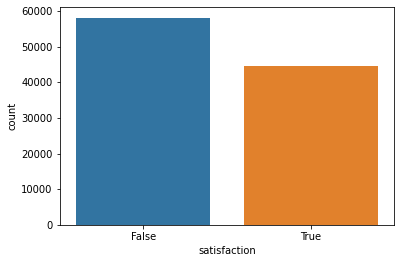

In [13]:
sns.countplot(x = df_airline_train_preprocessed_v1['satisfaction'])

In [14]:
print(f'In terms of percentage in the trainining set, {round(df_airline_train_preprocessed_v1["satisfaction"].sum()/df_airline_train_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the training dataset.')

In terms of percentage in the trainining set, 43.4% are satisfied in the data related to the training dataset.


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

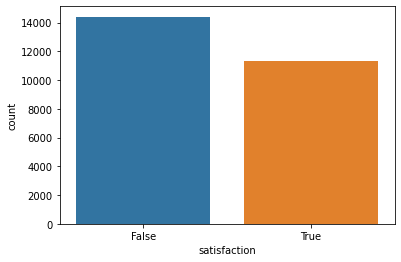

In [15]:
sns.countplot(x = df_airline_test_preprocessed_v1['satisfaction'])

In [16]:
print(f'In terms of percentage in the test set, {round(df_airline_test_preprocessed_v1["satisfaction"].sum()/df_airline_test_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the test dataset.')

In terms of percentage in the test set, 44.0% are satisfied in the data related to the test dataset.


We can see that this transformation did not affect the balance of the data, on the contrary, the data were even more balanced. 

Finally, let's place the transformations on the original datasets.

In [18]:
df_airline_train_preprocessed= df_airline_train_preprocessed_v1
df_airline_test_preprocessed= df_airline_test_preprocessed_v1

## Feature Engineering

In this module, we will transform the data of the features that have ranges of values with very high values when compared to other features. Various Machine Learning models don't generalize as well on data with high scale variance, so we will perform the scaling of some features.

### Scaling Flight Distance

In the first step, we observed that the distribution of the Flight Distance feature is between ranges with higher values relative to other features. To scale the data of this feature, we will use the log function, i.e., the original value is replaced by the value of its logarithm with the sum of 1.

The original values of this feature are distributed like this:

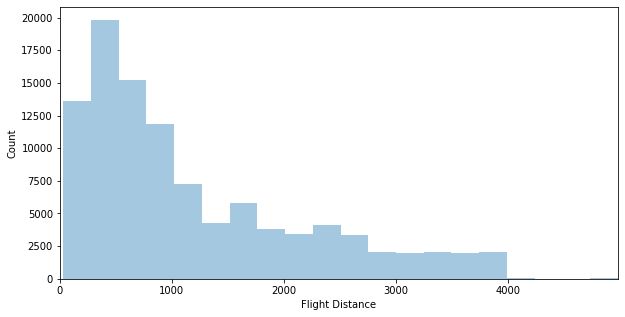

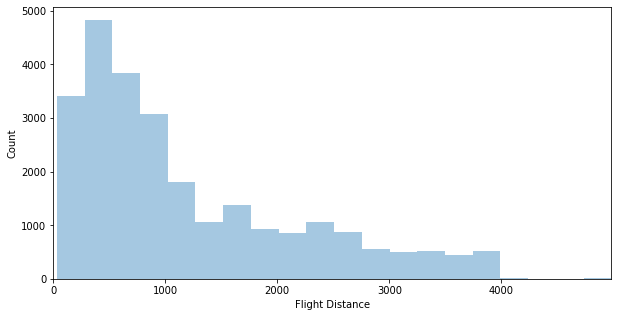

In [19]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

We replace this values for their logartihm with the sum of 1:

In [20]:
df_airline_train_preprocessed['Flight Distance'] = np.log(df_airline_train_preprocessed['Flight Distance']+1)
df_airline_test_preprocessed['Flight Distance'] = np.log(df_airline_test_preprocessed['Flight Distance']+1)

And the new distribution of the values of this feature is like this:

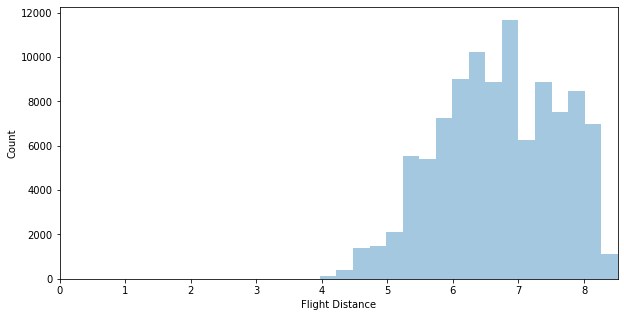

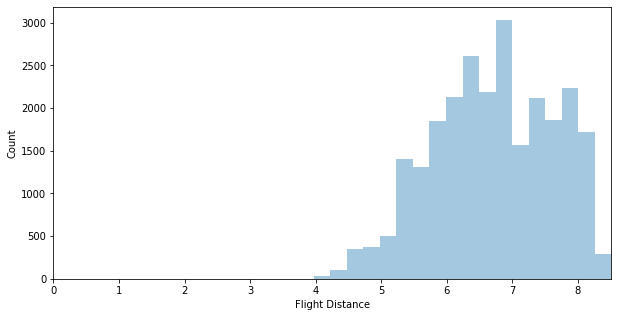

In [21]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

Now the values are between 4 and 9, so the scale variance has been reduced.

### Scaling Age

The age feature have also values between higher ranges when compared to other features. To scale this feature, we will going to divide the ages into ranges and then each range will have a corresponding numerical value from 0 to 13.

The original values of this feature are distributed like this:

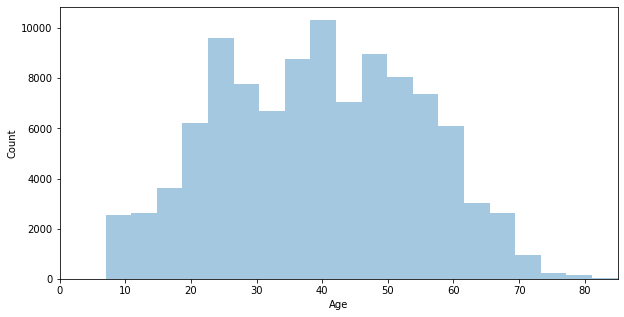

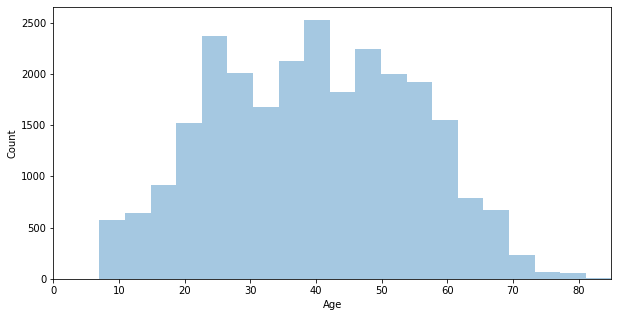

In [22]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Age'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Age'],bins=20,kde=False)
plt.show()

The transformation and the new distribution of the training dataset are the following:

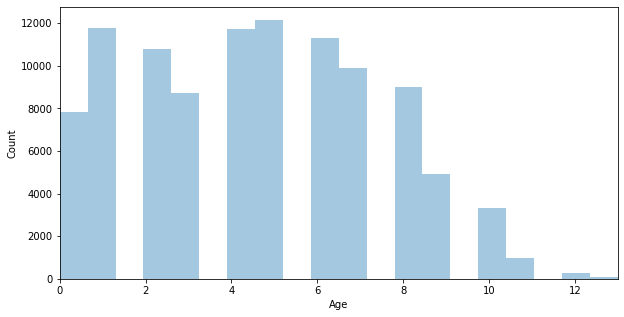

In [23]:
age_ranges = [
    df_airline_train_preprocessed['Age'] < 18, 
    (df_airline_train_preprocessed['Age'] >=18) & (df_airline_train_preprocessed['Age'] <= 24), 
    (df_airline_train_preprocessed['Age'] > 24) & (df_airline_train_preprocessed['Age'] <= 29), 
    (df_airline_train_preprocessed['Age'] > 29) & (df_airline_train_preprocessed['Age'] <= 34), 
    (df_airline_train_preprocessed['Age'] > 34) & (df_airline_train_preprocessed['Age'] <= 39), 
    (df_airline_train_preprocessed['Age'] > 39) & (df_airline_train_preprocessed['Age'] <= 44), 
    (df_airline_train_preprocessed['Age'] > 44) & (df_airline_train_preprocessed['Age'] <= 49), 
    (df_airline_train_preprocessed['Age'] > 49) & (df_airline_train_preprocessed['Age'] <= 54), 
    (df_airline_train_preprocessed['Age'] > 54) & (df_airline_train_preprocessed['Age'] <= 59), 
    (df_airline_train_preprocessed['Age'] > 59) & (df_airline_train_preprocessed['Age'] <= 64), 
    (df_airline_train_preprocessed['Age'] > 64) & (df_airline_train_preprocessed['Age'] <= 69), 
    (df_airline_train_preprocessed['Age'] > 69) & (df_airline_train_preprocessed['Age'] <= 74), 
    (df_airline_train_preprocessed['Age'] > 74) & (df_airline_train_preprocessed['Age'] <= 79), 
    (df_airline_train_preprocessed['Age'] > 79) 
]

new_age_values = [
    0, 
    1, 
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13
    
]
df_airline_train_preprocessed['Age'] = np.select(age_ranges,new_age_values)

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Age'],bins=20,kde=False)
plt.show()


The transformation and the new distribution of the test dataset are the following:

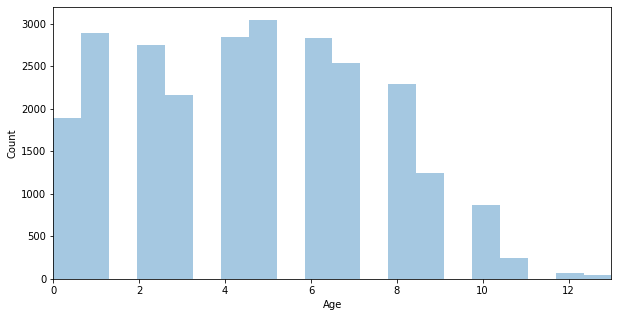

In [24]:
age_ranges_test = [
    df_airline_test_preprocessed['Age'] < 18, 
    (df_airline_test_preprocessed['Age'] >=18) & (df_airline_test_preprocessed['Age'] <= 24), 
    (df_airline_test_preprocessed['Age'] > 24) & (df_airline_test_preprocessed['Age'] <= 29), 
    (df_airline_test_preprocessed['Age'] > 29) & (df_airline_test_preprocessed['Age'] <= 34), 
    (df_airline_test_preprocessed['Age'] > 34) & (df_airline_test_preprocessed['Age'] <= 39), 
    (df_airline_test_preprocessed['Age'] > 39) & (df_airline_test_preprocessed['Age'] <= 44), 
    (df_airline_test_preprocessed['Age'] > 44) & (df_airline_test_preprocessed['Age'] <= 49), 
    (df_airline_test_preprocessed['Age'] > 49) & (df_airline_test_preprocessed['Age'] <= 54), 
    (df_airline_test_preprocessed['Age'] > 54) & (df_airline_test_preprocessed['Age'] <= 59), 
    (df_airline_test_preprocessed['Age'] > 59) & (df_airline_test_preprocessed['Age'] <= 64), 
    (df_airline_test_preprocessed['Age'] > 64) & (df_airline_test_preprocessed['Age'] <= 69), 
    (df_airline_test_preprocessed['Age'] > 69) & (df_airline_test_preprocessed['Age'] <= 74), 
    (df_airline_test_preprocessed['Age'] > 74) & (df_airline_test_preprocessed['Age'] <= 79), 
    (df_airline_test_preprocessed['Age'] > 79) 
]

df_airline_test_preprocessed['Age'] = np.select(age_ranges_test,new_age_values)

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Age'],bins=20,kde=False)
plt.show()

Now the values are between 0 and 13, so the scale variance has been reduced.

### Scaling Arrival Delay in Minutes

Even with the outliers removed, the values of the feature Arrival Delay in Minutes are still between ranges with high values (between 0 and 200).

The original values of this feature are distributed like this:

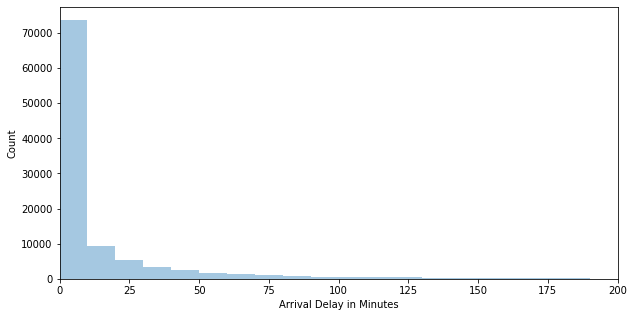

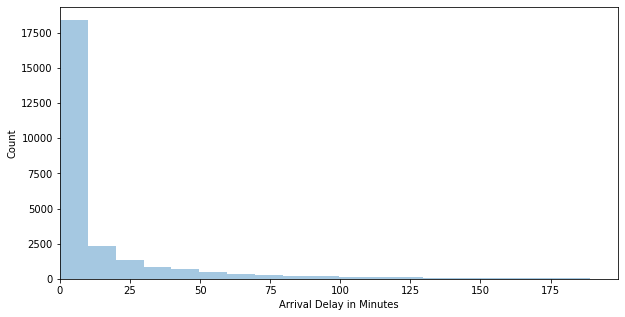

In [26]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

To scale the data of this feature, we will use the log function, i.e., the original value is replaced by the value of its logarithm with the sum of 1.

In [27]:
df_airline_train_preprocessed['Arrival Delay in Minutes'] = np.log(df_airline_train_preprocessed['Arrival Delay in Minutes']+1)
df_airline_test_preprocessed['Arrival Delay in Minutes'] = np.log(df_airline_test_preprocessed['Arrival Delay in Minutes']+1)

The new distribution of both datasets are the following:

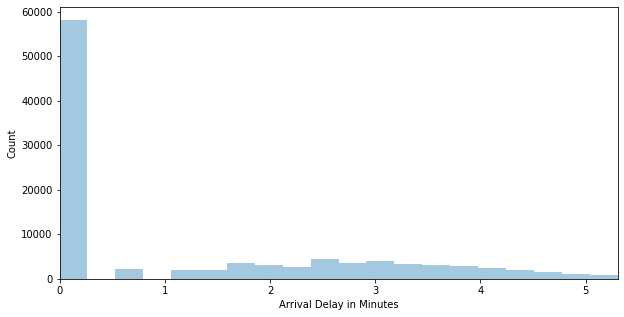

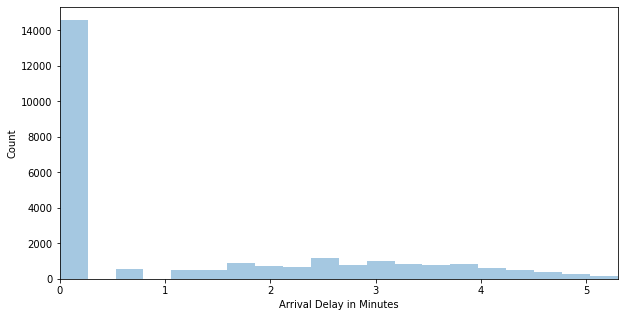

In [28]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

Now the values are between 0 and 6, so the scale variance has been reduced.

### Scaling Departure Delay in Minutes

The scaling of this feature will be done by the same way as the last feature (through the logarithm function), because their values were within the same ranges.

The original values of this feature are distributed like this:

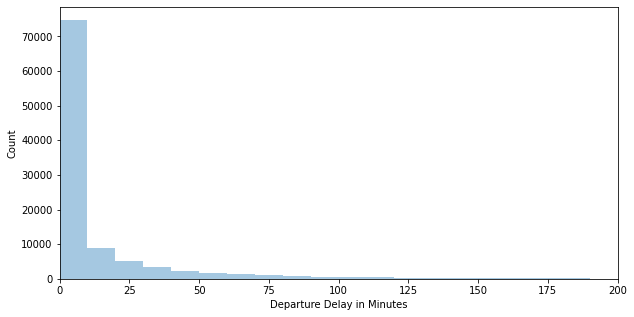

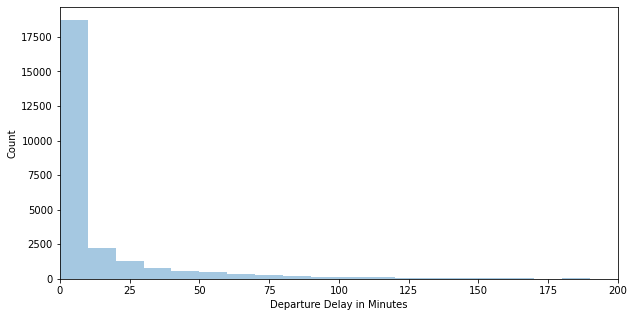

In [29]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

Scaling the data:

In [30]:
df_airline_train_preprocessed['Departure Delay in Minutes'] = np.log(df_airline_train_preprocessed['Departure Delay in Minutes']+1)
df_airline_test_preprocessed['Departure Delay in Minutes'] = np.log(df_airline_test_preprocessed['Departure Delay in Minutes']+1)

The new distribution of both datasets are the following:

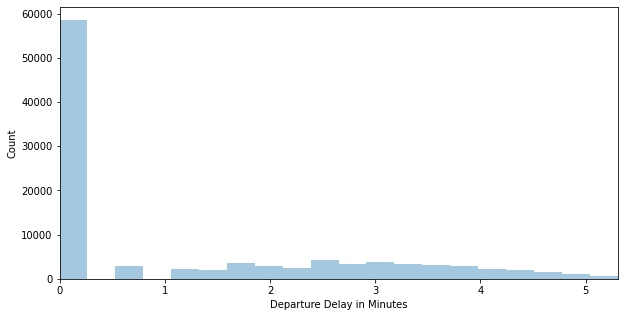

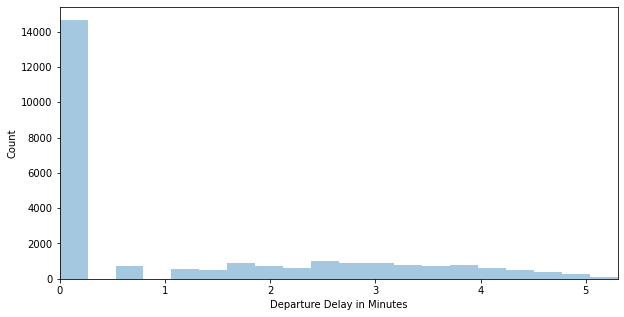

In [31]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

Now the values are between 0 and 6, so the scale variance has been reduced.

## Train-test split

This step is unnecessary because the data has already been divided with a file for training and another for testing.

## Save the processed datasets

The dataframes are saved in csv files to be able to be used in the next steps of the project.

In [32]:
df_airline_train_preprocessed.to_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_train__processed.csv')
df_airline_test_preprocessed.to_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_test__processed.csv')